In [220]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from fancyimpute import KNN 
import os
import statistics
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,roc_auc_score

%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [221]:
#Setting working directory
os.chdir("C:/Users/PRASHANT/Desktop/edwisors project 2")
print(os.getcwd())

C:\Users\PRASHANT\Desktop\edwisors project 2


In [222]:
#Loading Dataset
emp_data = pd.read_excel('Absenteeism_at_work_Project.xls')

In [223]:
emp_data = pd.DataFrame(emp_data)

In [224]:
#Creating Duplicate instances of data for Preprocessing and exploration
df = emp_data.copy()

In [225]:
#Renaming the column name as it will throw error while saving visualization graphs with the column name.
emp_data.columns = emp_data.columns.str.replace("Work load Average/day", "Work load Average per day")

In [226]:
# we need to replace the white spaces " " in the feature name with "_" for the sake of simplicity
for i in emp_data.columns:
    emp_data = emp_data.rename(index=str, columns={i: i.replace(" ", "_")})

In [227]:
#Checking info of data -> data types and rows n cols
emp_data.info()

#This shows that we have Missing Values for multiple columns which we will handle 

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason_for_absence                 737 non-null float64
Month_of_absence                   739 non-null float64
Day_of_the_week                    740 non-null int64
Seasons                            740 non-null int64
Transportation_expense             733 non-null float64
Distance_from_Residence_to_Work    737 non-null float64
Service_time                       737 non-null float64
Age                                737 non-null float64
Work_load_Average_per_day_         730 non-null float64
Hit_target                         734 non-null float64
Disciplinary_failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social_drinker                     737 non-null float64
Social_smoker                      736 non-null float64
Pet       

In [228]:
#This shows all the columns that have less than 740 non-null values implying we have missing values in our data set.

In [229]:
emp_data.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [230]:
#calculating number of unique values for all df columns
emp_data.nunique()

ID                                 36
Reason_for_absence                 28
Month_of_absence                   13
Day_of_the_week                     5
Seasons                             4
Transportation_expense             24
Distance_from_Residence_to_Work    25
Service_time                       18
Age                                22
Work_load_Average_per_day_         38
Hit_target                         13
Disciplinary_failure                2
Education                           4
Son                                 5
Social_drinker                      2
Social_smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body_mass_index                    17
Absenteeism_time_in_hours          19
dtype: int64

In [231]:
#since month variable can contain maximum 12 values, so here replace 0 with NA-
emp_data['Month_of_absence']= emp_data['Month_of_absence'].replace(0,np.nan)

emp_data.nunique()

ID                                 36
Reason_for_absence                 28
Month_of_absence                   12
Day_of_the_week                     5
Seasons                             4
Transportation_expense             24
Distance_from_Residence_to_Work    25
Service_time                       18
Age                                22
Work_load_Average_per_day_         38
Hit_target                         13
Disciplinary_failure                2
Education                           4
Son                                 5
Social_drinker                      2
Social_smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body_mass_index                    17
Absenteeism_time_in_hours          19
dtype: int64

In [232]:
# Dividing Work_load_Average/day_ by 1000 (as the values mentioned in the file are too big, so as discussed with the team)
emp_data['Work_load_Average_per_day_']= emp_data['Work_load_Average_per_day_']/1000

In [233]:
#checking the rename has done successfully
    emp_data.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average_per_day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [234]:
##remove ID column, it is not required

emp_data = emp_data.drop(['ID'], axis=1)

In [235]:
##check ID column has been removed
emp_data.head()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239.554,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239.554,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239.554,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [236]:
# we are divinding the Variables under " Continuous " and "Categorical"

    cont = ['Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Work_load_Average_per_day_', 'Transportation_expense',
           'Hit_target', 'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours']

    cat = ['Reason_for_absence','Month_of_absence','Day_of_the_week',
                         'Seasons','Disciplinary_failure', 'Education', 'Social_drinker',
                         'Social_smoker', 'Pet', 'Son']

# Data Pre-processing



# Missing value Analysis-

In [237]:
#Checking missing values in train dataset
print(emp_data.isnull().sum())
#result shows there are missing values in the dataset

Reason_for_absence                  3
Month_of_absence                    4
Day_of_the_week                     0
Seasons                             0
Transportation_expense              7
Distance_from_Residence_to_Work     3
Service_time                        3
Age                                 3
Work_load_Average_per_day_         10
Hit_target                          6
Disciplinary_failure                6
Education                          10
Son                                 6
Social_drinker                      3
Social_smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body_mass_index                    31
Absenteeism_time_in_hours          22
dtype: int64


In [238]:
##Missing value analysis-

#Creat dataframe with missing value present in each variable-
missing_value= pd.DataFrame(emp_data.isnull().sum()).reset_index()

#Rename variable-
missing_value= missing_value.rename(columns={'index':'variable',0:'missing_precentage'})

#Missing value precentage-
missing_value['missing_precentage']= (missing_value['missing_precentage']/len(emp_data))*100

#Sorting missing value-
missing_value= missing_value.sort_values('missing_precentage',ascending=False).reset_index(drop=True)

#Write missing data into drive-
missing_value.to_csv("missing_value.csv",index=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

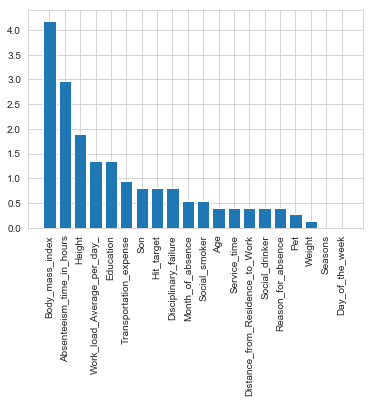

In [239]:
#Missing value analysis by visualization-
plt.bar(missing_value['variable'],missing_value['missing_precentage'])
plt.xticks(rotation=90)

# Imputation methods

In [240]:
# eliminating rows for which value of "Absenteeism time in hours" is missing
emp_data = emp_data.drop(emp_data[emp_data['Absenteeism_time_in_hours'].isnull()].index, axis=0)
print(emp_data.shape)
print(emp_data['Absenteeism_time_in_hours'].isnull().sum())

(718, 20)
0


In [241]:
##value of before imputing (Actual)
emp_data['Body_mass_index'].iloc[44]

25.0

In [40]:
# Checking for "Body mass index" column
# Actual value = 25.0
# Mean = 26.70
# Median = 25.0
# KNN = 25.08

In [79]:
#create missing value
emp_data['Body_mass_index'].iloc[44] = np.nan

In [16]:
#checking that actual value is replaced with NA or not.
emp_data['Body_mass_index'].iloc[44]

25.0

In [18]:
## first we will try to Impute with mean
emp_data['Body_mass_index'] = emp_data['Body_mass_index'].fillna(emp_data['Body_mass_index'].mean())


In [19]:
#checking the value after imputating the value using mean imputation
emp_data['Body_mass_index'].iloc[44]

26.709302325581394

In [18]:
#now we will try to impute the value using median imputation
emp_data['Body_mass_index'] = emp_data['Body_mass_index'].fillna(emp_data['Body_mass_index'].median())

In [19]:
emp_data['Body_mass_index'].iloc[44]

25.0

In [91]:
#now we will try to impute the value using KNN imputation

emp_data = pd.DataFrame(KNN(k = 3).fit_transform(emp_data), columns = emp_data.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.102
Imputing row 101/718 with 0 missing, elapsed time: 0.103
Imputing row 201/718 with 0 missing, elapsed time: 0.104
Imputing row 301/718 with 0 missing, elapsed time: 0.104
Imputing row 401/718 with 0 missing, elapsed time: 0.104
Imputing row 501/718 with 0 missing, elapsed time: 0.105
Imputing row 601/718 with 0 missing, elapsed time: 0.105
Imputing row 701/718 with 0 missing, elapsed time: 0.106


C:\Users\PRASHANT\Anaconda3\lib\site-packages\fancyimpute\solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [39]:
#checking the value after imputating the value using KNN imputation
emp_data['Body_mass_index'].iloc[44]

25.0

In [ ]:
#as we know our data contains categorical and contionus variables
#we will impute missing value of categorical variables using mode imputation
#for continous variable we will use Median imputation as it is showing the nearest results in imputaiton of missing values.

In [242]:
for i in cat:
    emp_data[i] = emp_data[i].fillna(emp_data[i].mode().iloc[0])

In [243]:
#check all the values has been imputed succesfully
#all the categorical values has been imputed only continous variables missing values is need to be impute in the next step
print(emp_data.isnull().sum())

Reason_for_absence                  0
Month_of_absence                    0
Day_of_the_week                     0
Seasons                             0
Transportation_expense              6
Distance_from_Residence_to_Work     3
Service_time                        3
Age                                 2
Work_load_Average_per_day_          8
Hit_target                          6
Disciplinary_failure                0
Education                           0
Son                                 0
Social_drinker                      0
Social_smoker                       0
Pet                                 0
Weight                              1
Height                             14
Body_mass_index                    29
Absenteeism_time_in_hours           0
dtype: int64


In [244]:
#now imputing continous variables
emp_data = emp_data.fillna(emp_data.median())

In [245]:
# again check all the values has been imputed succesfully
print(emp_data.isnull().sum())

Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average_per_day_         0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64


## OutLier Analysis

In [246]:
def box_plot(x):
    plt.boxplot(emp_data[x])
    plt.xlabel(x,fontsize= 15)
    plt.ylabel('Values',fontsize= 15)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title("Boxplot for {X}".format(X=x),fontsize = 20)
    plt.savefig("Boxplot for {X}.png".format(X=x))
    plt.show()

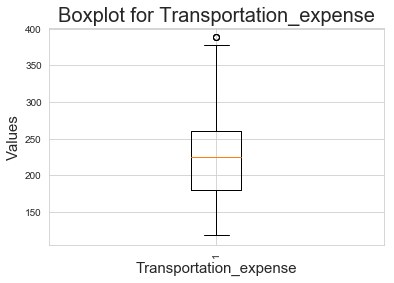

In [247]:
box_plot('Transportation_expense')

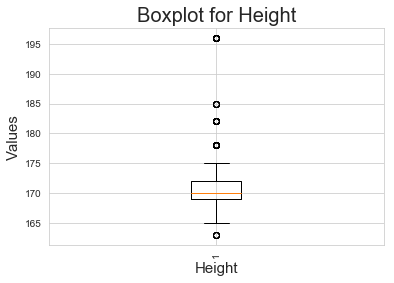

In [248]:
box_plot('Height')

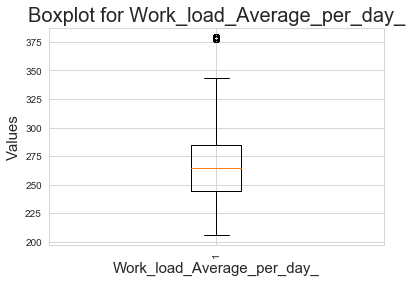

In [249]:
box_plot('Work_load_Average_per_day_')

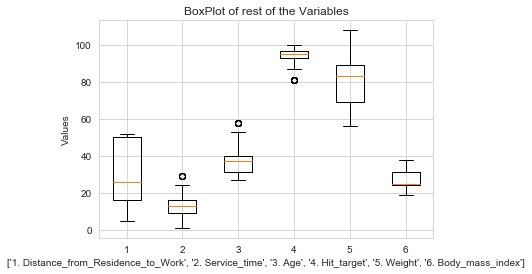

In [250]:
plt.boxplot([ emp_data['Distance_from_Residence_to_Work'], emp_data['Service_time'], emp_data['Age'], emp_data['Hit_target'], emp_data['Weight'], emp_data['Body_mass_index']])
plt.xlabel(['1. Distance_from_Residence_to_Work', '2. Service_time', '3. Age', '4. Hit_target', '5. Weight', '6. Body_mass_index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')
plt.savefig('Boxplot for other variables')

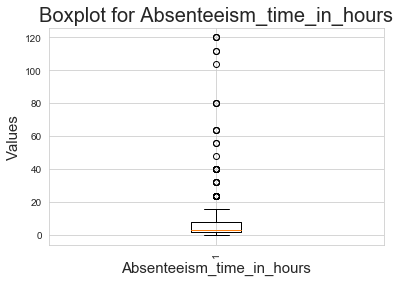

In [251]:
box_plot('Absenteeism_time_in_hours')

In [252]:
# From the above boxplot we can conclude that in variables 'Distance from Residence to Work', 'Weight' and 'Body mass index'
#there are no outliers

In [253]:
# list of variables which doesn't have outlier
Ignore = ['Distance from Residence to Work', 'Weight', 'Body mass index']

In [254]:
# Looping for all continuos variables to detect and impute Outliers
for i in cont:
    # Avoiding the variables which doesn't have outlier
    if i in Ignore:
        continue
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(emp_data[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(i)
    print(minimum)
    print(maximum)
    
    
    # Replacing all the outliers value to NA
    emp_data.loc[emp_data[i]< minimum,i] = np.nan
    emp_data.loc[emp_data[i]> maximum,i] = np.nan

Distance_from_Residence_to_Work
-35.0
101.0
Service_time
-1.5
26.5
Age
17.5
53.5
Work_load_Average_per_day_
183.688
345.552
Transportation_expense
57.5
381.5
Hit_target
87.0
103.0
Height
164.5
176.5
Body_mass_index
13.5
41.5
Absenteeism_time_in_hours
-7.0
17.0


In [255]:
# Imputing missing values with KNN
emp_data = pd.DataFrame(KNN(k = 3).fit_transform(emp_data), columns = emp_data.columns)


# Checking if there is any missing value
emp_data.isnull().sum().sum()

Imputing row 1/718 with 0 missing, elapsed time: 0.129
Imputing row 101/718 with 0 missing, elapsed time: 0.130
Imputing row 201/718 with 1 missing, elapsed time: 0.131
Imputing row 301/718 with 0 missing, elapsed time: 0.132
Imputing row 401/718 with 0 missing, elapsed time: 0.133
Imputing row 501/718 with 0 missing, elapsed time: 0.133
Imputing row 601/718 with 2 missing, elapsed time: 0.134
Imputing row 701/718 with 0 missing, elapsed time: 0.135


0

In [79]:
###Checking box plot after imputing the outliers correctly

In [256]:
### box plot after treating the outliers
def box_plot(x):
    plt.boxplot(emp_data[x])
    plt.xlabel(x,fontsize= 15)
    plt.ylabel('Values',fontsize= 15)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title("Boxplot for {X}".format(X=x),fontsize = 20)
    plt.savefig("Boxplot for {X}.png".format(X=x))
    plt.show()


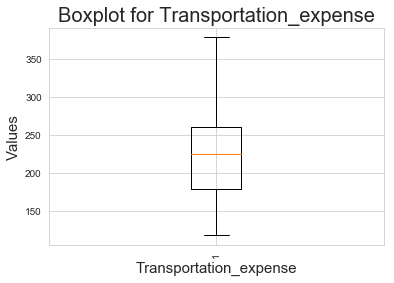

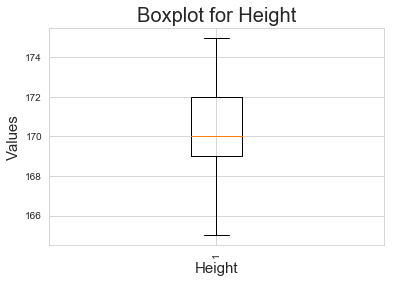

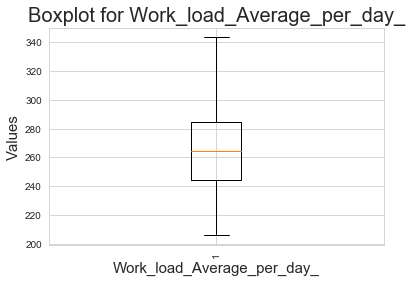

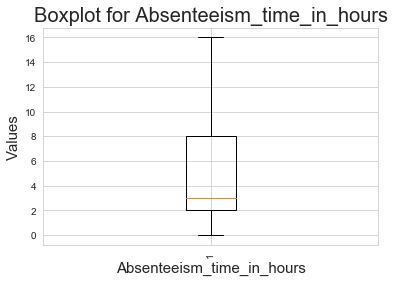

In [257]:
box_plot('Transportation_expense')
box_plot('Height')
box_plot('Work_load_Average_per_day_')
box_plot('Absenteeism_time_in_hours')

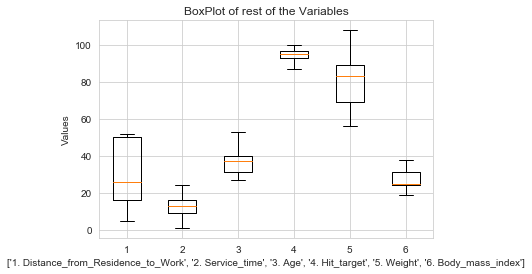

In [258]:
plt.boxplot([ emp_data['Distance_from_Residence_to_Work'], emp_data['Service_time'], emp_data['Age'], emp_data['Hit_target'], emp_data['Weight'], emp_data['Body_mass_index']])
plt.xlabel(['1. Distance_from_Residence_to_Work', '2. Service_time', '3. Age', '4. Hit_target', '5. Weight', '6. Body_mass_index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')
plt.savefig('Boxplot for other variables')

In [259]:
## we have noticed that all the data type is float64, so coverting the categorical variables into object

emp_data.dtypes

Reason_for_absence                 float64
Month_of_absence                   float64
Day_of_the_week                    float64
Seasons                            float64
Transportation_expense             float64
Distance_from_Residence_to_Work    float64
Service_time                       float64
Age                                float64
Work_load_Average_per_day_         float64
Hit_target                         float64
Disciplinary_failure               float64
Education                          float64
Son                                float64
Social_drinker                     float64
Social_smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body_mass_index                    float64
Absenteeism_time_in_hours          float64
dtype: object

In [260]:
## Create a list of variables which are incorrectly classified as numeric
convert_obj = ['Reason_for_absence',
 'Month_of_absence',
 'Day_of_the_week',
 'Seasons',
 'Disciplinary_failure',
 'Education',
 'Son',
 'Social_drinker',
 'Social_smoker',
 'Pet']
for i in convert_obj:
    emp_data.loc[:,i] = emp_data.loc[:,i].astype('object')

emp_data.dtypes

Reason_for_absence                  object
Month_of_absence                    object
Day_of_the_week                     object
Seasons                             object
Transportation_expense             float64
Distance_from_Residence_to_Work    float64
Service_time                       float64
Age                                float64
Work_load_Average_per_day_         float64
Hit_target                         float64
Disciplinary_failure                object
Education                           object
Son                                 object
Social_drinker                      object
Social_smoker                       object
Pet                                 object
Weight                             float64
Height                             float64
Body_mass_index                    float64
Absenteeism_time_in_hours          float64
dtype: object

### Feature Selection

In [261]:
#checking the value counts of reason for absense variable
emp_data['Reason_for_absence'].value_counts()

23.0    149
28.0    109
27.0     69
13.0     54
19.0     40
0.0      36
22.0     33
26.0     32
25.0     31
11.0     25
10.0     23
18.0     21
14.0     18
1.0      16
7.0      15
12.0      8
6.0       7
8.0       6
21.0      6
9.0       4
5.0       3
24.0      3
16.0      3
4.0       2
15.0      2
3.0       1
2.0       1
17.0      1
Name: Reason_for_absence, dtype: int64

In [262]:
# Combining similar groups in feature to simplify analysis
emp_data['Reason_for_absence'] = emp_data['Reason_for_absence'].replace({0:1,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:1,12:1,
                                                             13:1,14:1,15:1,16:1,17:1,18:1,19:1,20:1,21:2,22:2,23:3,
                                                             24:3,25:4,26:5,27:2,28:1})

In [263]:
# Viewing new categories in the feature
emp_data['Reason_for_absence'].value_counts()

1    395
3    152
2    108
5     32
4     31
Name: Reason_for_absence, dtype: int64

In [264]:
###again need to convert data type for reason for absense variable
emp_data.loc[:,'Reason_for_absence'] = emp_data.loc[:,'Reason_for_absence'].astype('object')

In [265]:
emp_data1 = emp_data.copy()

[]

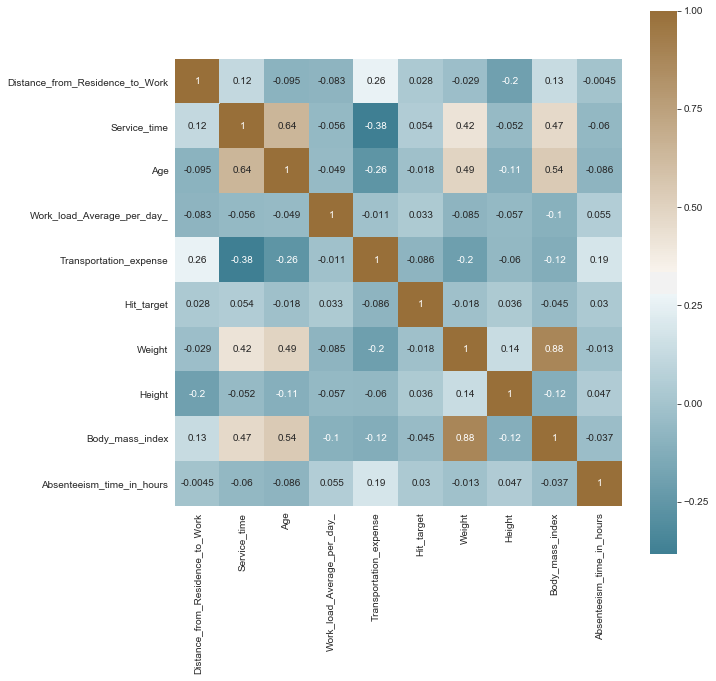

In [266]:


##Correlation analysis for continuous variables
#Correlation plot
data_corr = emp_data.loc[:,cont]

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = data_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [267]:
##Correlation analysis for numeric variables-

#extract only numeric variables in dataframe for correlation-
df_corr= emp_data.loc[:,cont]

#Generate correlation matrix-
corr_matrix= df_corr.corr()

In [268]:
corr_matrix

,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day_,Transportation_expense,Hit_target,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
Distance_from_Residence_to_Work,1.000000,0.117918,-0.095477,-0.082682,0.260420,0.027772,-0.029291,-0.195792,0.130864,-0.004523
Service_time,0.117918,1.000000,0.644318,-0.056133,-0.383395,0.053561,0.420772,-0.052091,0.466036,-0.060266
Age,-0.095477,0.644318,1.000000,-0.049062,-0.260758,-0.017831,0.494639,-0.108752,0.543395,-0.085998
Work_load_Average_per_day_,-0.082682,-0.056133,-0.049062,1.000000,-0.011490,0.033152,-0.085037,-0.056555,-0.103761,0.055075
Transportation_expense,0.260420,-0.383395,-0.260758,-0.011490,1.000000,-0.086106,-0.200271,-0.059693,-0.120574,0.188619
Hit_target,0.027772,0.053561,-0.017831,0.033152,-0.086106,1.000000,-0.017819,0.035844,-0.045051,0.030366
Weight,-0.029291,0.420772,0.494639,-0.085037,-0.200271,-0.017819,1.000000,0.136365,0.884206,-0.012699
Height,-0.195792,-0.052091,-0.108752,-0.056555,-0.059693,0.035844,0.136365,1.000000,-0.117099,0.046680
Body_mass_index,0.130864,0.466036,0.543395,-0.103761,-0.120574,-0.045051,0.884206,-0.117099,1.000000,-0.036722
Absenteeism_time_in_hours,-0.004523,-0.060266,-0.085998,0.055075,0.188619,0.030366,-0.012699,0.046680,-0.036722,1.000000


In [269]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [270]:
#loop for ANOVA test Since the target variable is continuous
##Anova test for categorical predictor and numeric target variable-

label = 'Absenteeism_time_in_hours'
for  i in cat:
    frame = label + ' ~ ' + i
    model = ols(frame,data=emp_data).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    print(anova)   
    
    

                         sum_sq     df         F        PR(>F)
Reason_for_absence   682.160154    4.0  15.81819  2.061860e-12
Residual            7687.039265  713.0       NaN           NaN
                       sum_sq     df         F    PR(>F)
Month_of_absence   248.813139   11.0  1.966567  0.029064
Residual          8120.386280  706.0       NaN       NaN
                      sum_sq     df         F    PR(>F)
Day_of_the_week    71.806910    4.0  1.542603  0.188047
Residual         8297.392509  713.0       NaN       NaN
               sum_sq     df         F    PR(>F)
Seasons     60.164603    3.0  1.723326  0.160796
Residual  8309.034816  714.0       NaN       NaN
                           sum_sq     df          F        PR(>F)
Disciplinary_failure   668.019942    1.0  62.107665  1.211203e-14
Residual              7701.179478  716.0        NaN           NaN
                sum_sq     df         F    PR(>F)
Education    33.578440    3.0  0.958737  0.411713
Residual   8335.620979  714

In [97]:
#H0 - all the variables are independent of each other
#H1 - all the variables are not indpendent of each other.
# we will drop days of the week,seasons, education,social smoker for our further modelling steps
#we will drop weight variable as it is showing high correlation with BMI 

In [271]:
drop_it = ['Weight', 'Social_smoker', 'Education','Day_of_the_week', 'Seasons']
emp_data = emp_data.drop(drop_it, axis = 1)

In [272]:
cont = [i for i in cont if i not in drop_it]
cat = [i for i in cat if i not in drop_it]

In [273]:
cont

['Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Work_load_Average_per_day_',
 'Transportation_expense',
 'Hit_target',
 'Height',
 'Body_mass_index',
 'Absenteeism_time_in_hours']

In [274]:
emp_data2 = emp_data.copy()

### Feature Scaling  

In [275]:
# Using scipy to check the skewness of the numerical variables
print("*******************************************************************")
for i in cont:
    skewness = stats.describe(emp_data.loc[:,i])
    print("statistical properities of {0:5s}:".format(i))
    print(skewness)
    print("*******************************************************************")

*******************************************************************
statistical properities of Distance_from_Residence_to_Work:
DescribeResult(nobs=718, minmax=(5.0, 52.0), mean=29.571030640668525, variance=217.7710982389483, skewness=0.3203316612216078, kurtosis=-1.2365994161993255)
*******************************************************************
statistical properities of Service_time:
DescribeResult(nobs=718, minmax=(1.0, 24.0), mean=12.487465182146963, variance=17.184640428773555, skewness=-0.3492012456371221, kurtosis=-0.15556169737511594)
*******************************************************************
statistical properities of Age  :
DescribeResult(nobs=718, minmax=(27.0, 53.0), mean=36.16855300843214, variance=37.1019467703063, skewness=0.4831269349478348, kurtosis=-0.2474122988379106)
*******************************************************************
statistical properities of Work_load_Average_per_day_:
DescribeResult(nobs=718, minmax=(205.917, 343.253), mean=267.1860

In [276]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
emp_data['Absenteeism_time_in_hours'] = np.log1p(emp_data['Absenteeism_time_in_hours'])

Distance_from_Residence_to_Work


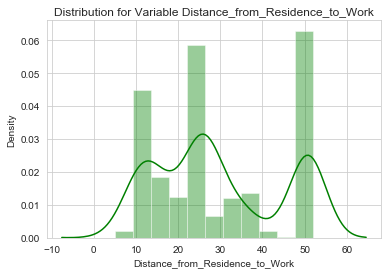

Service_time


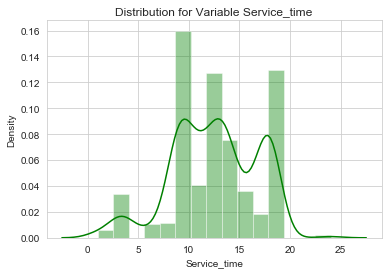

Age


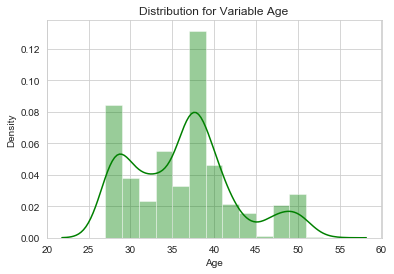

Work_load_Average_per_day_


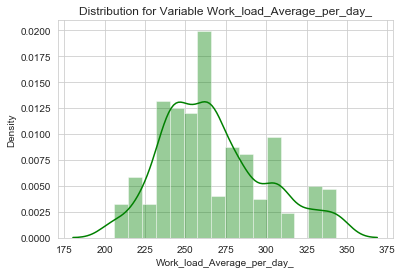

Transportation_expense


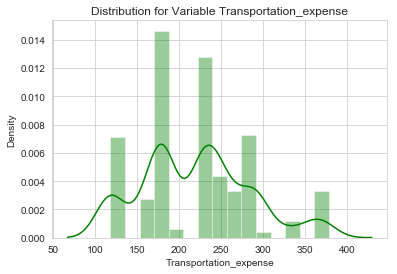

Hit_target


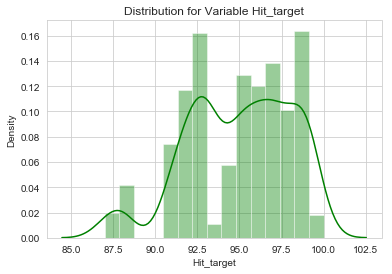

Height


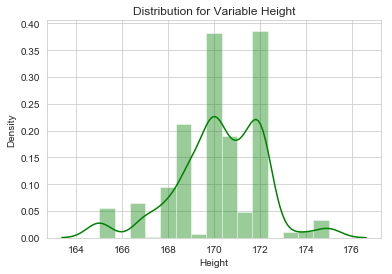

Body_mass_index


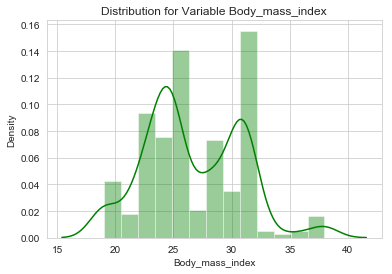

Absenteeism_time_in_hours


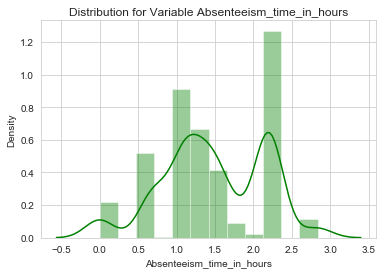

In [277]:
#Normality check to check data is uniformly distributed or not-

for i in cont:
    print(i)
    sns.distplot(emp_data[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [278]:
# Since our data is not normally distributed, we will use Normalization for Feature Scalling
# #Normalization
for i in cont:
    if i == 'Absenteeism_time_in_hours':
        continue
    emp_data[i] = (emp_data[i] - emp_data[i].min())/(emp_data[i].max()-emp_data[i].min())

Distance_from_Residence_to_Work


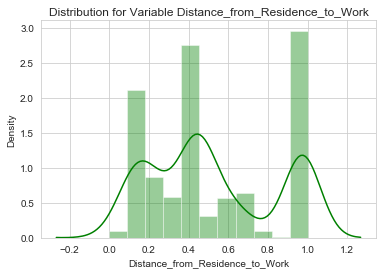

Service_time


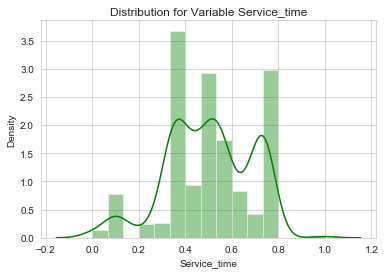

Age


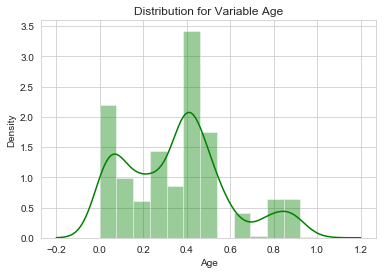

Work_load_Average_per_day_


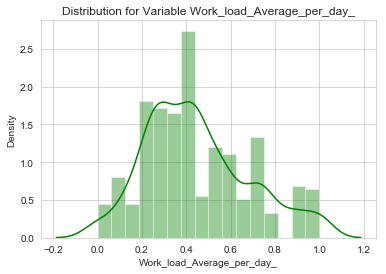

Transportation_expense


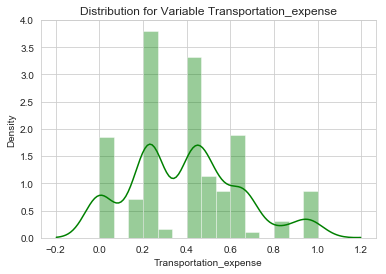

Hit_target


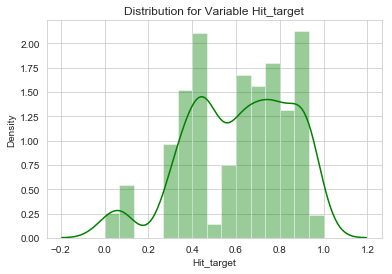

Height


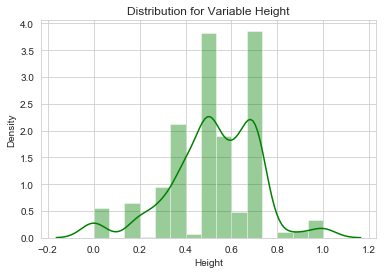

Body_mass_index


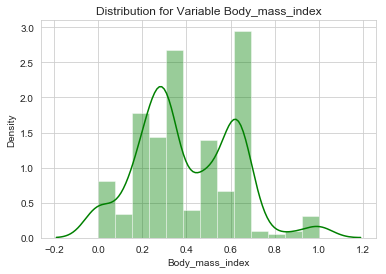

Absenteeism_time_in_hours


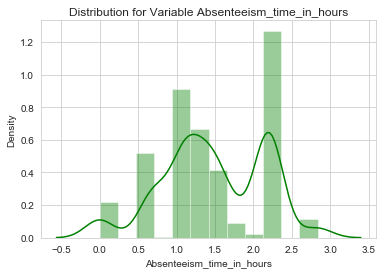

In [279]:
# Checking the distribution of values for variables in data after normalization
for i in cont:
    print(i)
    sns.distplot(emp_data[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [280]:
emp_data.head()

,Reason_for_absence,Month_of_absence,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day_,Hit_target,Disciplinary_failure,Son,Social_drinker,Pet,Height,Body_mass_index,Absenteeism_time_in_hours
0,5,7,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0,2,1,1,0.699999,0.578947,1.609438
1,1,7,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,1,1,1,0,0.699999,0.631579,0.000000
2,3,7,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0,0,1,0,0.500000,0.631579,1.098612
3,1,7,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0,2,1,0,0.300000,0.263158,1.609438
4,3,7,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0,2,1,1,0.699999,0.578947,1.098612


# Creating Dummy variales

In [281]:
#### before going for algorithms we will use dummy variables analysis for categorical variables

dummy_emp_data = pd.get_dummies(data = emp_data, columns = cat)

# Copying dataframe
emp_data3 = dummy_emp_data.copy()

In [282]:
##check the heads post using dummy variables
dummy_emp_data.head()

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day_,Hit_target,Height,Body_mass_index,Absenteeism_time_in_hours,Reason_for_absence_1,...,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_0.0,Son_1.0,Son_2.0,Son_3.0,Son_4.0
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.699999,0.578947,1.609438,0,...,1,0,0,0,0,0,0,1,0,0
1,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,0.699999,0.631579,0.000000,1,...,0,0,0,0,0,0,1,0,0,0
2,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.500000,0.631579,1.098612,0,...,0,0,0,0,0,1,0,0,0,0
3,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.300000,0.263158,1.609438,1,...,0,0,0,0,0,0,0,1,0,0
4,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.699999,0.578947,1.098612,0,...,1,0,0,0,0,0,0,1,0,0


In [283]:
dummy_emp_data.shape

(718, 41)

### Machine Learning algorithems

###train test split

In [284]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [285]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( dummy_emp_data.iloc[:, dummy_emp_data.columns != 'Absenteeism_time_in_hours'], 
                         dummy_emp_data.iloc[:, 8], test_size = 0.20, random_state = 1)

In [286]:
#checking the shape of the train and test 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(574, 40) (574,)
(144, 40) (144,)


###Decsion Tree

In [287]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [288]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [289]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [290]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.547396187805271
Root Mean Squared Error For Test data = 0.5478922461592647


In [291]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.3169795409221665

In [292]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.26315319756909017

###Random Forest

In [293]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

In [294]:
# Building model on top of training dataset
#here we have chose n_estimators = 200, we will further try to evaluate the performance of the model by tuning
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [295]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [296]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [297]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 0.2433953880317634
Root Mean Squared Error For Test data = 0.49696442270196534


0.3937699042434335

In [299]:
## calculate R^2 for train data

r2_score(y_train, pred_train_RF)

0.8649623520053085

###Linear Regression

In [300]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

In [301]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [302]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [303]:
##calculating RMSE for train data
RMSE_train_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR))

##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

In [304]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 0.49248961045203155
Root Mean Squared Error For Test data = 0.5337466860199246


In [305]:
#calculate R^2 for train data
r2_score(y_train, pred_train_LR)



0.447128348982633

In [306]:
#calculate R^2 for test data

r2_score(y_test, pred_test_LR)

0.3007100644511098

In [307]:
#Linear Regression model for regression-
LR_model= sm.OLS(y_test,X_test).fit()
print(LR_model.summary())

                                OLS Regression Results                               
Dep. Variable:     Absenteeism_time_in_hours   R-squared:                       0.563
Model:                                   OLS   Adj. R-squared:                  0.426
Method:                        Least Squares   F-statistic:                     4.126
Date:                       Wed, 27 Mar 2019   Prob (F-statistic):           9.58e-09
Time:                               00:21:52   Log-Likelihood:                -80.107
No. Observations:                        144   AIC:                             230.2
Df Residuals:                            109   BIC:                             334.2
Df Model:                                 34                                         
Covariance Type:                   nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

##Gradient Boosting

In [308]:
# Importing library for GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

In [309]:
# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [310]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [311]:
##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))

##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [312]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For Training data = 0.40159388901327125
Root Mean Squared Error For Test data = 0.4680004269864299


In [313]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)


0.4623750771155887

In [314]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.6323755677958434

#### Principle component analysis

In [315]:
target = dummy_emp_data['Absenteeism_time_in_hours']

In [316]:
X = dummy_emp_data.drop(['Absenteeism_time_in_hours'],axis=1)

In [317]:
from sklearn.decomposition import PCA

In [318]:
#scaled_data = preprocessing.scale(X)
X1= X.values
pca = PCA()
pca.fit(X1)
pca_data = pca.transform(X1)

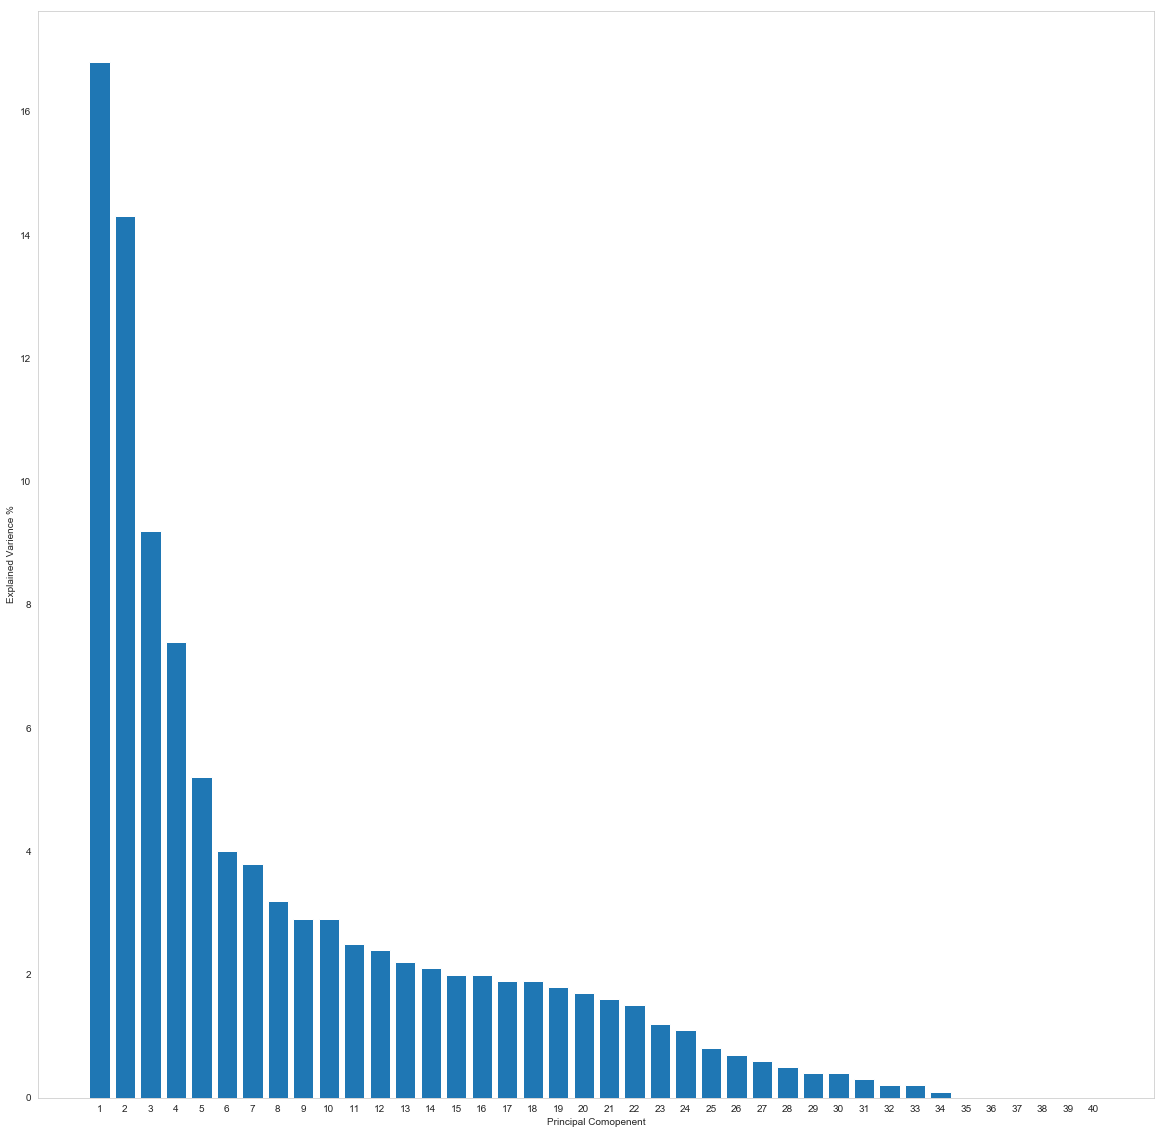

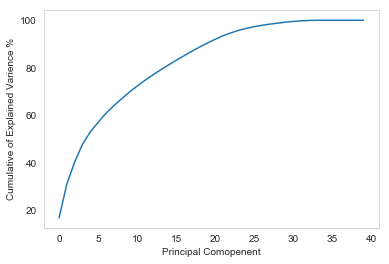

In [319]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals = 1)
lables = [ str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,20))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=lables)
plt.grid()
plt.ylabel('Explained Varience %')
plt.xlabel('Principal Comopenent')
plt.savefig('PCA1.pdf')
plt.show()

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var)
plt.grid()
plt.ylabel('Cumulative of Explained Varience %')
plt.xlabel('Principal Comopenent')
plt.savefig('PCA2.pdf')
plt.show()

In [320]:
# From the above plot selecting 30 components since it explains almost 95+ % data variance
pca = PCA(n_components=25)
# Fitting the selected components to the data
pca.fit(X)
pca_data = pca.fit_transform(X)
# Using train_test_split sampling function for test and train data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_data, target, test_size = 0.20, random_state = 1)

In [321]:
X_train.shape

(574, 25)

In [322]:
####checking Linear regressioin post applying PCA

In [323]:
fit_LR_pca = LinearRegression().fit(X_train , y_train)

In [324]:
#prediction on train data
pred_train_LR_pca = fit_LR_pca.predict(X_train)

#prediction on test data
pred_test_LR_pca = fit_LR_pca.predict(X_test)

In [325]:
##calculating RMSE for train data
RMSE_train_LR_pca = np.sqrt(mean_squared_error(y_train, pred_train_LR_pca))

##calculating RMSE for test data
RMSE_test_LR_pca = np.sqrt(mean_squared_error(y_test, pred_test_LR_pca))


In [326]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR_pca))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR_pca))


Root Mean Squared Error For Training data = 0.49971733568539844
Root Mean Squared Error For Test data = 0.5298617772528172


In [327]:
#calculate R^2
r2_score(y_train, pred_train_LR_pca)

0.43078149915892905

In [328]:
#calculate R^2
r2_score(y_test, pred_test_LR_pca)

0.31085266924103283

In [329]:
####checking decision tree post applying PCA

In [330]:
fit_DT_pca = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [331]:
#prediction on train data
pred_train_DT_pca = fit_DT_pca.predict(X_train)

#prediction on test data
pred_test_DT_pca = fit_DT_pca.predict(X_test)

In [332]:
##calculating RMSE for train data
RMSE_train_DT_pca = np.sqrt(mean_squared_error(y_train, pred_train_DT_pca))

##calculating RMSE for test data
RMSE_test_DT_pca = np.sqrt(mean_squared_error(y_test, pred_test_DT_pca))

In [333]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT_pca))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT_pca))

Root Mean Squared Error For Training data = 0.577714920840029
Root Mean Squared Error For Test data = 0.57144077280215


In [334]:
## R^2 calculation for training data
r2_score(y_train, pred_train_DT_pca)

0.23922305284594092

In [335]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT_pca)

0.19845235301635167

In [336]:
####checking random forest post applying PCA

In [337]:
# Building model on top of training dataset
fit_RF_pca = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

In [338]:
#predicting test and train data
pred_train_RF_pca = fit_RF_pca.predict(X_train)
pred_test_RF_pca = fit_RF_pca.predict(X_test)

In [339]:
#check for RMSE
rmse_for_train_RF_pca = np.sqrt(mean_squared_error(y_train,pred_train_RF_pca))
rmse_for_test_RF_pca = np.sqrt(mean_squared_error(y_test,pred_test_RF_pca))

In [340]:
print(str(rmse_for_train_RF_pca))
print(str(rmse_for_test_RF_pca))


0.24447580292086413
0.5443641892700991


In [341]:
#calculate R^2
r2_score(y_train, pred_train_RF_pca)

0.8637608461001068

In [342]:
## R^2 calculation for test data
r2_score(y_test, pred_test_RF_pca)

0.2726122380976782

In [343]:
#### gradient boosting post pca

In [344]:
# Building model on top of training dataset
fit_GB_pca= GradientBoostingRegressor().fit(X_train, y_train)

In [345]:
# training data to check for over fitting
pred_train_GB_pca = fit_GB_pca.predict(X_train)
pred_test_GB_pca = fit_GB_pca.predict(X_test)

In [346]:
## Calculating RMSE 
rmse_for_train_GB_pca = np.sqrt(mean_squared_error(y_train,pred_train_GB_pca))
 
rmse_for_test_GB_pca = np.sqrt(mean_squared_error(y_test,pred_test_GB_pca))

In [347]:
print(str(rmse_for_train_GB_pca))
print(str(rmse_for_test_GB_pca))

0.32316545422424825
0.5223051309278457


In [348]:
r2_score(y_train, pred_train_GB_pca)

0.7619435054513222

In [349]:
r2_score(y_test, pred_test_GB_pca)

0.33036911053770823

# optimizing the results with some other parameters tuning

In [370]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [371]:
##Random Hyperparameter Grid

In [372]:
##Random Search CV

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.34.
RMSE =  0.5195841805278332


In [373]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 9, 'n_estimators': 15}
R-squared = 0.34.
RMSE =  0.5195841805278332


In [374]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())


Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [375]:
##Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.35.
RMSE =  0.5158359089869833


In [376]:
## Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.34.
RMSE =  0.5170968325710154


# Predict loss for 2011 from previous years data

In [377]:
loss = emp_data1

In [378]:
loss.head(5)

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,5,7,3,1,289.0,36.0,13.0,33.0,239.554,97.0,0,1,2,1,0,1,90.0,172.0,30.0,4.0
1,1,7,3,1,118.0,13.0,18.0,50.0,239.554,97.0,1,1,1,1,0,0,98.0,172.0,31.0,0.0
2,3,7,4,1,179.0,51.0,18.0,38.0,239.554,97.0,0,1,0,1,0,0,89.0,170.0,31.0,2.0
3,1,7,5,1,279.0,5.0,14.0,39.0,239.554,97.0,0,1,2,1,1,0,68.0,168.0,24.0,4.0
4,3,7,5,1,289.0,36.0,13.0,33.0,239.554,97.0,0,1,2,1,0,1,90.0,172.0,30.0,2.0


In [379]:
# Calculating average work loss per day
loss['work_loss_average/day'] = 0
for i  in range(len(loss)):
    loss['work_loss_average/day'].loc[i] = ((loss['Work_load_Average_per_day_'].loc[i])/24)*loss['Absenteeism_time_in_hours'].loc[i]

In [380]:
loss.head(5)

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day_,Hit_target,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,work_loss_average/day
0,5,7,3,1,289.0,36.0,13.0,33.0,239.554,97.0,...,1,2,1,0,1,90.0,172.0,30.0,4.0,39.925667
1,1,7,3,1,118.0,13.0,18.0,50.0,239.554,97.0,...,1,1,1,0,0,98.0,172.0,31.0,0.0,0.000000
2,3,7,4,1,179.0,51.0,18.0,38.0,239.554,97.0,...,1,0,1,0,0,89.0,170.0,31.0,2.0,19.962833
3,1,7,5,1,279.0,5.0,14.0,39.0,239.554,97.0,...,1,2,1,1,0,68.0,168.0,24.0,4.0,39.925667
4,3,7,5,1,289.0,36.0,13.0,33.0,239.554,97.0,...,1,2,1,0,1,90.0,172.0,30.0,2.0,19.962833


In [381]:
loss_month = loss.groupby('Month_of_absence').sum()

In [382]:
loss_month

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day_,Hit_target,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,work_loss_average/day
Month_of_absence,,,,,,,,,,,
1.0,9106.000000,1210.0,603.0,1748.000000,15606.851000,4820.000000,3949.0,8535.250327,1310.0,171.685945,2252.982436
2.0,14914.423517,2585.0,946.0,2540.000000,19454.925000,6999.000000,5643.0,12211.589780,1923.0,279.399772,3167.922989
3.0,18733.000000,2810.0,1225.0,3226.571393,23663.868000,8559.000000,6871.0,14949.724845,2359.0,443.695125,5204.045042
4.0,11954.000000,1434.0,649.0,1942.000000,14567.117000,5014.000000,4176.0,9034.754331,1391.0,239.910496,2732.008531
5.0,13477.000000,1469.0,752.0,2231.000000,15349.368584,6040.000000,4886.0,10596.863358,1595.0,259.744293,2648.590871
6.0,10815.000000,1508.0,665.0,2002.000000,14300.308053,5039.000000,4212.0,9053.222404,1409.0,240.571077,2711.681699
7.0,15007.000000,1896.0,759.0,2296.630280,16258.458000,6173.000000,5216.0,11084.317455,1734.0,370.688157,3914.799769
8.0,12598.000000,1653.0,648.0,1935.000000,12380.750000,4833.000000,4235.0,8857.687887,1433.0,237.163987,2332.985366
9.0,11242.000000,1591.0,656.0,1854.000000,13319.239000,4577.476979,4026.0,8493.374663,1348.0,186.356411,2113.592214


In [383]:
loss = loss_month[['Absenteeism_time_in_hours', 'work_loss_average/day']]

In [384]:
loss = loss.rename(columns={'Absenteeism_time_in_hours': 'Total Absenteeism time in a month (hrs)', 
                            'work_loss_average/day': 'Work loss per month'})

In [385]:
loss

,Total Absenteeism time in a month (hrs),Work loss per month
Month_of_absence,,
1.0,171.685945,2252.982436
2.0,279.399772,3167.922989
3.0,443.695125,5204.045042
4.0,239.910496,2732.008531
5.0,259.744293,2648.590871
6.0,240.571077,2711.681699
7.0,370.688157,3914.799769
8.0,237.163987,2332.985366
9.0,186.356411,2113.592214


# some extra inferences

In [25]:
emp_data.head(5)

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239.554,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239.554,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239.554,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239.554,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239.554,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [47]:
def relationship(a,b):
    df = emp_data.groupby(a)[b].sum()
    df = df.reset_index()
    df[b] = (df[b]*100)/sum(emp_data[b])
    df = df.sort_values(by=['Absenteeism_time_in_hours'])
    print(df)
    return df.plot.barh(x=a,y=b, figsize = (12,10))

    Reason_for_absence  Absenteeism_time_in_hours
0                  0.0                   0.000000
2                  2.0                   0.121076
16                16.0                   0.190154
3                  3.0                   0.253539
17                17.0                   0.253539
4                  4.0                   0.285231
15                15.0                   0.507078
5                  5.0                   0.602155
23                24.0                   0.760617
8                  8.0                   1.014156
20                21.0                   1.109233
12                12.0                   1.206415
9                  9.0                   1.342862
6                  6.0                   1.615390
7                  7.0                   2.430266
14                14.0                   3.008595
24                25.0                   3.422776
1                  1.0                   3.898162
11                11.0                   4.584478


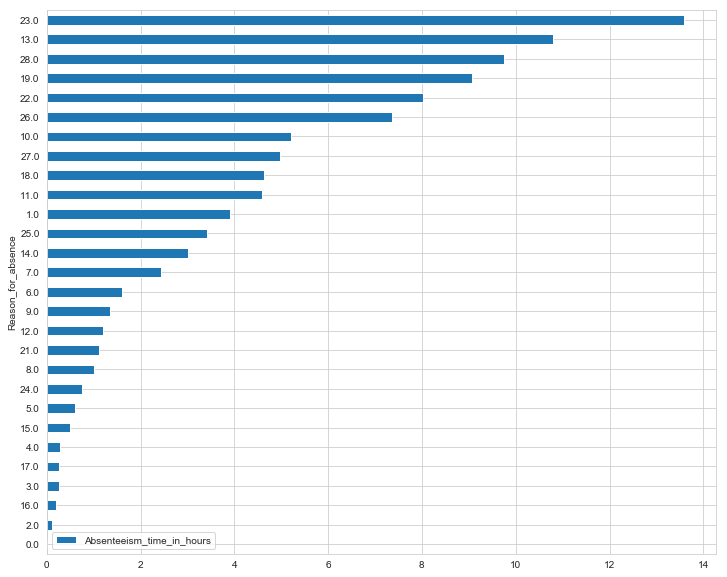

In [49]:
relationship('Reason_for_absence','Absenteeism_time_in_hours')

    Month_of_absence  Absenteeism_time_in_hours
0                1.0                   5.441135
8                9.0                   5.906077
11              12.0                   6.320236
7                8.0                   7.516289
3                4.0                   7.603333
5                6.0                   7.624268
10              11.0                   7.786612
4                5.0                   8.231913
1                2.0                   8.854842
9               10.0                   8.905557
6                7.0                  11.747987
2                3.0                  14.061751


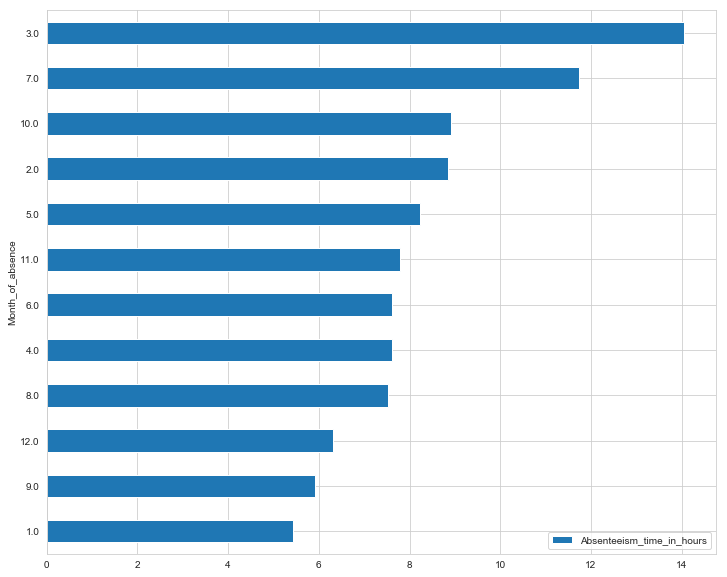

In [67]:
relationship('Month_of_absence','Absenteeism_time_in_hours')

   Day_of_the_week  Absenteeism_time_in_hours
3              5.0                  16.860342
4              6.0                  17.052198
1              3.0                  20.248309
2              4.0                  21.062205
0              2.0                  24.776947


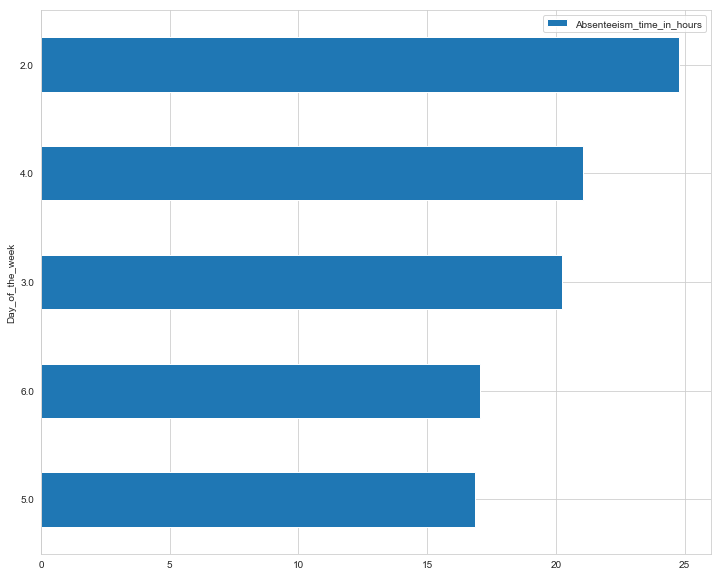

In [68]:
relationship('Day_of_the_week', 'Absenteeism_time_in_hours')

   Education  Absenteeism_time_in_hours
3        4.0                   0.665540
1        2.0                   7.399406
2        3.0                  10.691505
0        1.0                  81.243549


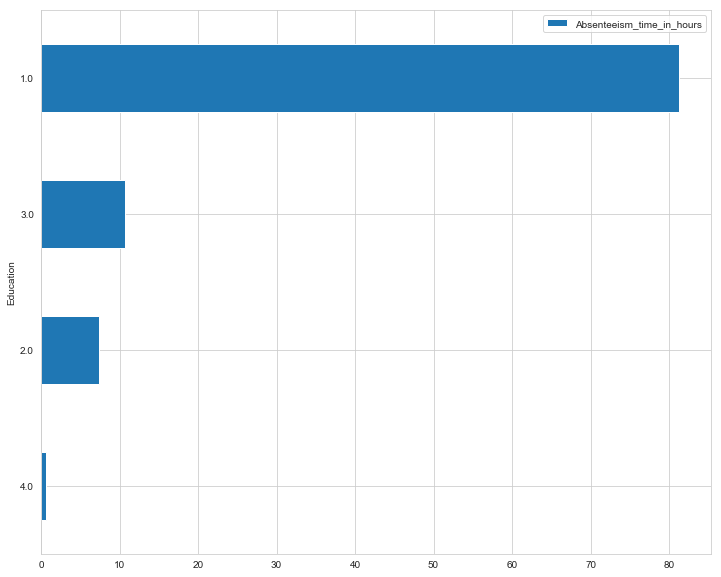

In [70]:

relationship('Education','Absenteeism_time_in_hours')

    Distance_from_Residence_to_Work  Absenteeism_time_in_hours
19                             45.0                   0.000000
16                             35.0                   0.000000
20                             48.0                   0.507078
18                             42.0                   0.602155
0                               5.0                   0.950771
13                             27.0                   0.982464
21                             49.0                   1.014156
5                              14.0                   1.325630
6                              15.0                   1.679696
8                              17.0                   2.609663
4                              13.0                   2.694116
10                             22.0                   2.968167
14                             29.0                   3.074160
9                              20.0                   3.296007
15                             31.0                   3

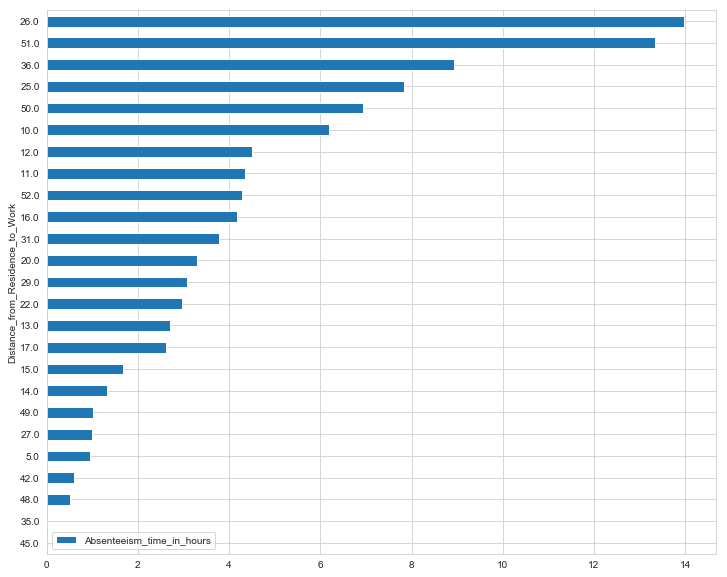

In [72]:
relationship('Distance_from_Residence_to_Work','Absenteeism_time_in_hours')

    Service_time  Absenteeism_time_in_hours
12          13.0                   0.031692
11          13.0                   0.063385
18          24.0                   0.507078
4            7.0                   0.602155
14          15.0                   0.665540
3            6.0                   0.982464
0            1.0                   1.077541
5            8.0                   1.838158
2            4.0                   2.846620
16          17.0                   2.968167
1            3.0                   4.283667
7           10.0                   6.199178
15          16.0                   6.850138
9           12.0                   7.359748
8           11.0                   7.753663
13          14.0                  11.605791
6            9.0                  13.446067
17          18.0                  14.945992
10          13.0                  15.972956


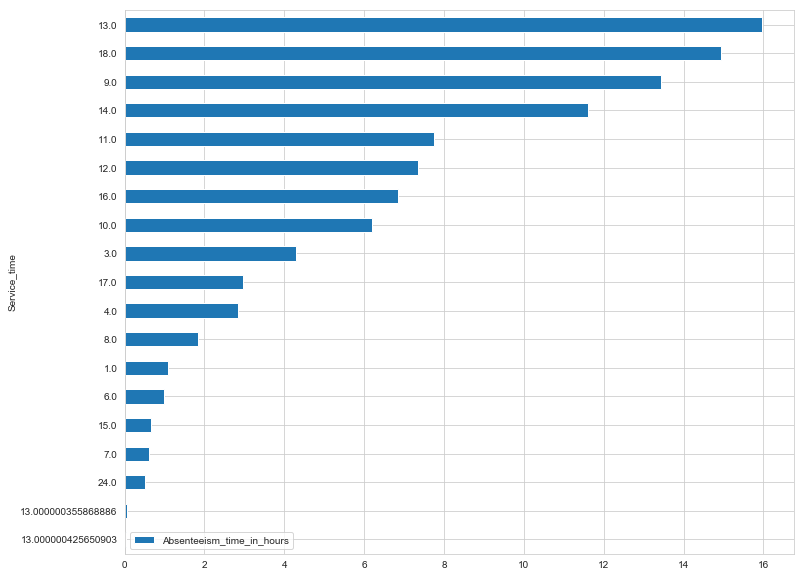

In [73]:
relationship('Service_time','Absenteeism_time_in_hours')